In [219]:
#Import Python libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [220]:
#Import data into dataframe
df=pd.read_csv('Asteroid.csv')
df.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [221]:
#Get information about dataframe columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [222]:
#Get value counts for classification column
df.iloc[:, -1].value_counts()

False    3932
True      755
Name: Hazardous, dtype: int64

In [223]:
#Select relevant columns
data=df.iloc[:,[2,3,4,13,18,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,39]]
print(data.columns)

Index(['Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)',
       'Relative Velocity km per sec', 'Miss Dist.(kilometers)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Orbital Period', 'Perihelion Distance', 'Perihelion Arg',
       'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion',
       'Hazardous'],
      dtype='object')


Hazardous                       0.000000
Jupiter Tisserand Invariant     0.003404
Perihelion Arg                  0.003865
Inclination                     0.009607
Semi Major Axis                 0.010770
Orbital Period                  0.011168
Mean Motion                     0.013028
Asc Node Longitude              0.017536
Miss Dist.(kilometers)          0.032407
Perihelion Time                 0.038113
Aphelion Dist                   0.040800
Epoch Osculation                0.040940
Mean Anomaly                    0.054164
Est Dia in KM(min)              0.132424
Est Dia in KM(max)              0.132424
Eccentricity                    0.183269
Relative Velocity km per sec    0.191970
Perihelion Distance             0.207027
Minimum Orbit Intersection      0.288949
Absolute Magnitude              0.325522
Orbit Uncertainity              0.328721
Name: Hazardous, dtype: float64


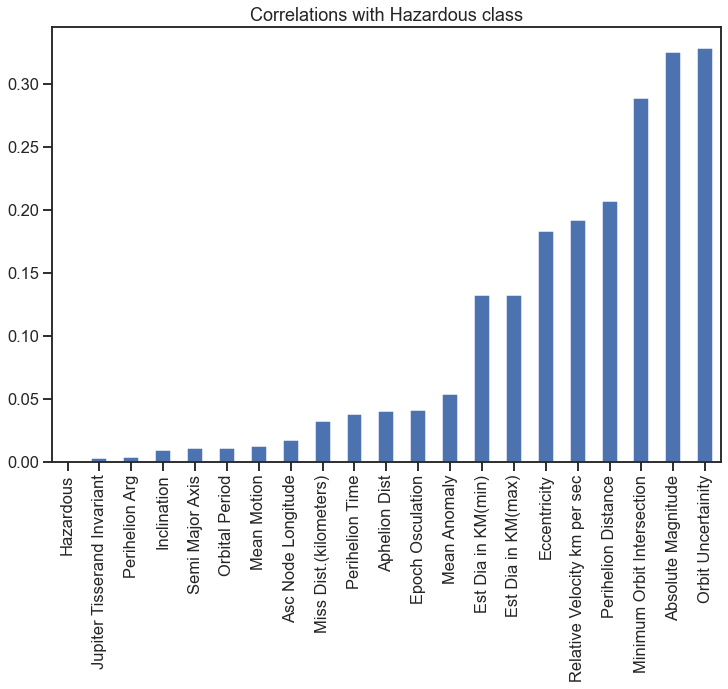

In [224]:
#Plot correlations with Hazardous class
corr_matrix = data.corr()

for i in range(corr_matrix.shape[1]):
    corr_matrix.iloc[i,i] = 0
 
correlations=corr_matrix['Hazardous']
correlations=correlations.abs().sort_values()
print(correlations)
ax = correlations.plot(kind='bar',title='Correlations with Hazardous class',figsize=(12,8))

C:\Users\re487\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\re487\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\re487\anaconda3\lib\site-packages\seaborn\axisgrid.py:130: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < LooseVersion("3.0"):


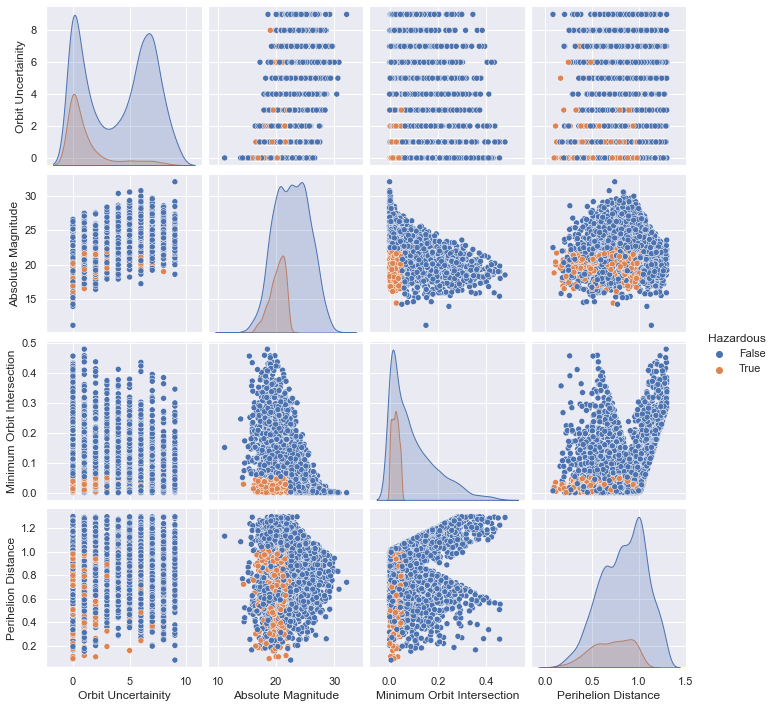

In [225]:
#Pairplot of variables highly correlated with Hazardous class
data2=data.loc[:,['Orbit Uncertainity','Absolute Magnitude', 'Minimum Orbit Intersection','Perihelion Distance']]
data2=pd.concat([data2,data['Hazardous']],axis=1)

sns.set(rc={"figure.figsize":(12, 8)})
sns.pairplot(data2,hue='Hazardous')

In [226]:
#Split dataframe into independent variables and class feature
x = data.drop(columns='Hazardous')
y = data['Hazardous']
label_encoder = LabelEncoder()
y = pd.DataFrame(label_encoder.fit_transform(y))
y.columns=['Hazardous']

In [227]:
#Scale features with StandardScaler function

scaler = StandardScaler()
x_scale = scaler.fit_transform(x)
x_scale=pd.DataFrame(x_scale)
x_scale.columns=x.columns

In [228]:
#Split data into stratified train and test sets
X_train, X_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.3, random_state = 10, stratify=y)

In [229]:
##Create array from y_train
y_train2= y_train.to_numpy()
y_train2= y_train2.ravel()

In [230]:
#Define function for classification metrics

def evaluate_metrics(yt, yp):
    results = {}
    results['accuracy'] = accuracy_score(yt, yp)
    results['recall'] = recall_score(yt, yp,average=None)
    results['precision'] = precision_score(yt, yp, average=None)
    results['f1_score'] = f1_score(yt, yp,average=None)
    return results

In [231]:
#Logistic Regression with default solver and l2 penaly
l2_model = LogisticRegression(random_state=10,penalty='l2', max_iter=1000)

In [232]:
#Fit l2 model
l2_model.fit(X_train, y_train2)

LogisticRegression(max_iter=1000, random_state=10)

In [233]:
#Create predictions from model
l2_preds = l2_model.predict(X_test)

In [235]:
#Get metrics
evaluate_metrics(y_test, l2_preds)


{'accuracy': 0.9559346126510305,
 'recall': array([0.9779661 , 0.84140969]),
 'precision': array([0.9697479 , 0.88018433]),
 'f1_score': array([0.97383966, 0.86036036])}

In [236]:
#Print confusion matrix from predictions
cf = confusion_matrix(y_test, l2_preds)
print(cf)

[[1154   26]
 [  36  191]]


In [237]:
#Logistic Regression model with saga solver and l1 penalty
l1_model = LogisticRegression(random_state=10, penalty='l1', solver='saga', max_iter = 1000)

In [238]:
#Fit l1 model
l1_model.fit(X_train, y_train2)

LogisticRegression(max_iter=1000, penalty='l1', random_state=10, solver='saga')

In [239]:
#Get predictions
l1_preds = l1_model.predict(X_test)

In [240]:
#Get metrics for model predictions
evaluate_metrics(y_test, l1_preds)

{'accuracy': 0.9552238805970149,
 'recall': array([0.97711864, 0.84140969]),
 'precision': array([0.96972246, 0.87614679]),
 'f1_score': array([0.9734065 , 0.85842697])}

In [241]:
#Print confustion matrix from predictions
cf = confusion_matrix(y_test, l1_preds)
print(cf)

[[1153   27]
 [  36  191]]


In [242]:
#Import LogisticRegressionCV to optimize model
from sklearn.linear_model import LogisticRegressionCV

#Regularized Logistic Regression with liblinear solver and l1 penalty
l1 = LogisticRegressionCV(Cs=10, cv=3, penalty='l1', solver='liblinear',max_iter=1000).fit(X_train, y_train2)

In [243]:

# Regularized logistic Regression with liblinear solver and l2 penalty
l2= LogisticRegressionCV(Cs=10, cv=3,penalty='l2',solver='liblinear',max_iter=1000).fit(X_train, y_train2)

In [244]:
# Predict the class

l1_pred =l1.predict(X_test)
l2_pred =l2.predict(X_test)


In [245]:
#Get metrics for l1 cv model
evaluate_metrics(y_test, l1_pred)

{'accuracy': 0.9566453447050463,
 'recall': array([0.97881356, 0.84140969]),
 'precision': array([0.9697733 , 0.88425926]),
 'f1_score': array([0.97427246, 0.86230248])}

In [246]:
#Get metrics for l2 cv model
evaluate_metrics(y_test, l2_pred)


{'accuracy': 0.9566453447050463,
 'recall': array([0.97881356, 0.84140969]),
 'precision': array([0.9697733 , 0.88425926]),
 'f1_score': array([0.97427246, 0.86230248])}

In [247]:
#Save metrics
metrics=np.arange(6)
metrics = metrics.astype(np.float64)
lr_accuracy=accuracy_score(y_test, l2_pred)
lr_score=f1_score(y_test, l2_pred)
metrics[0]=lr_accuracy
metrics[1]=lr_score


In [248]:
#Print confusion matrix
cf_lr = confusion_matrix(y_test, l2_pred)
print(cf_lr)

[[1155   25]
 [  36  191]]


C:\Users\re487\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\re487\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\re487\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\re487\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax

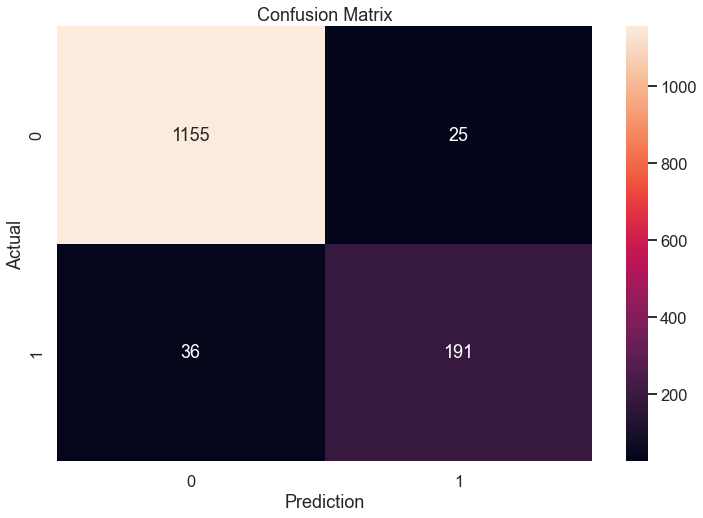

In [249]:
#Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set_context('talk')
ax = sns.heatmap(cf_lr, annot=True,fmt="d")
ax.set(title="Confusion Matrix",ylabel='Actual',xlabel='Prediction');

In [250]:
#Import KNearestNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [251]:
#Loop through k values. Create list of f1 scores and errors.

k_max = 20
f1_scores = []
error_rates = [] 
accuracy_scores=[]

for k in range(1, k_max):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train2)
    y_pred = knn.predict(X_test)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test,average='binary')
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
 
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

C:\Users\re487\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\re487\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


Text(0.5, 1.0, 'KNN F1 Score')

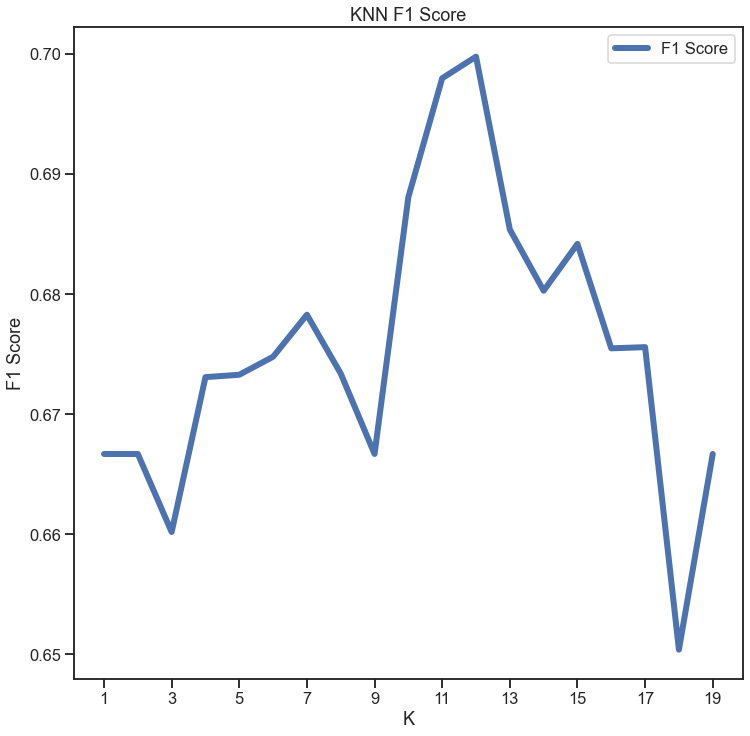

In [252]:
# Plot f1 score results
sns.set_context('talk')
sns.set_style('ticks')

ax = f1_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, k_max, 2));
plt.title('KNN F1 Score')


Text(0.5, 1.0, 'KNN Elbow Curve')

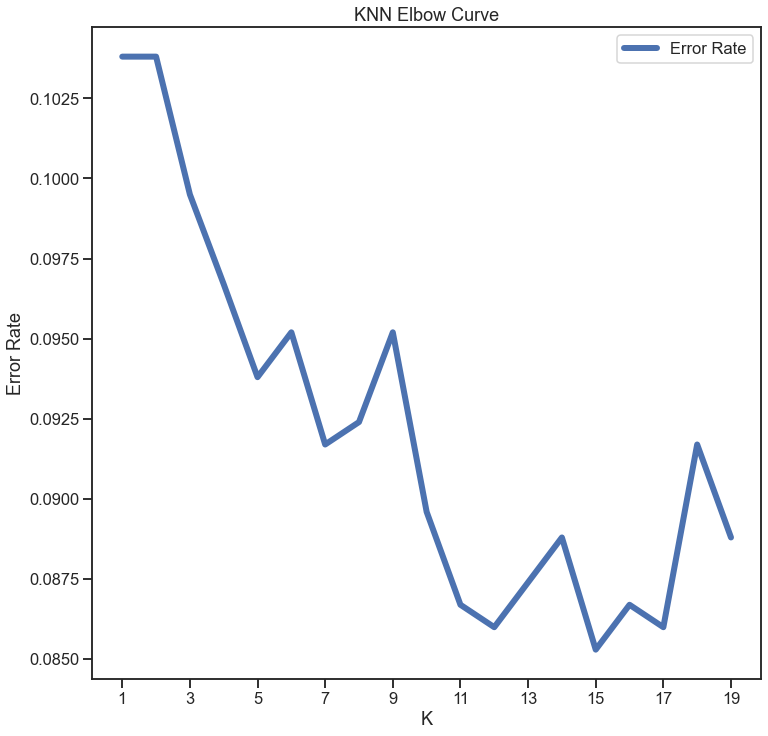

In [253]:
#Plot error results
ax = error_results.set_index('K').plot(figsize=(12, 12), linewidth=6)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, k_max, 2))
plt.title('KNN Elbow Curve')


In [254]:
#Fit model with best k value using elbow method
knn = KNeighborsClassifier(n_neighbors=12, weights='distance')
knn = knn.fit(X_train, y_train2)   
y_pred = knn.predict(X_test)

In [255]:
#Get metrics
evaluate_metrics(y_test, y_pred)

{'accuracy': 0.914001421464108,
 'recall': array([0.97033898, 0.62114537]),
 'precision': array([0.9301381 , 0.80113636]),
 'f1_score': array([0.94981336, 0.69975186])}

In [256]:
#Save metrics
knn_accuracy=accuracy_score(y_test, y_pred)
knn_score=f1_score(y_test, l2_pred)
metrics[2]=knn_accuracy
metrics[3]=knn_score

In [257]:
#Print confusion matrix
cf_knn = confusion_matrix(y_test, y_pred)
print(cf_knn)

[[1145   35]
 [  86  141]]


C:\Users\re487\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\re487\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


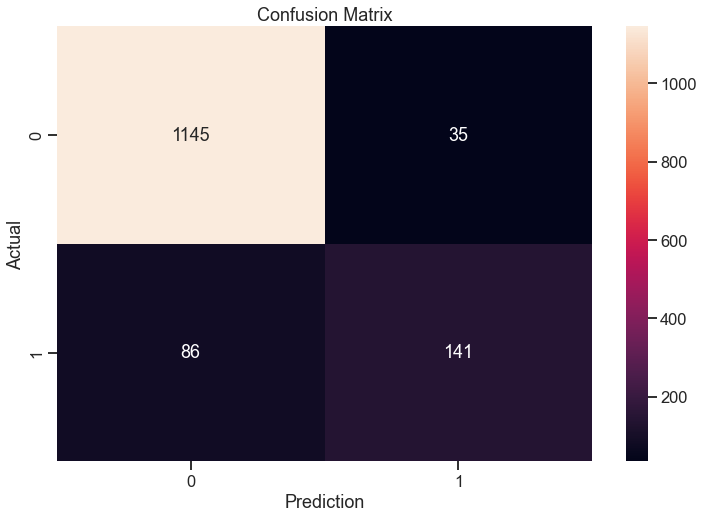

In [258]:
#Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.set_context('talk')
ax = sns.heatmap(cf_knn, annot=True, fmt="d")
ax.set(title="Confusion Matrix",ylabel='Actual',xlabel='Prediction');

In [259]:
#Import support vector machine functions
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [260]:
#Create list of parameters for GridSearchCV
Cs = { 'C': [1, 5, 10, 50, 100] }

In [261]:
# Define a GridSearchCV function to find linear svc parameters with best f1 score

warnings.simplefilter("ignore")
LSVC = LinearSVC(max_iter=2000,random_state=10)
param_search = GridSearchCV(estimator = LSVC, param_grid = Cs, scoring='f1',cv = 5)

#Get best parameters from training data
param_search.fit(X_train, y_train2)
best = param_search.best_params_
print(best)

{'C': 10}


In [262]:
#Train LinearSVC model with best parameters and get metrics
model = LinearSVC(C=10, max_iter=2000, random_state=10)
model.fit(X_train, y_train2)
svc_pred = model.predict(X_test)
evaluate_metrics(y_test, svc_pred )

{'accuracy': 0.9538024164889837,
 'recall': array([0.97457627, 0.84581498]),
 'precision': array([0.97046414, 0.86486486]),
 'f1_score': array([0.97251586, 0.85523385])}

In [263]:
#Create grid of parameters for GridSearchCV
grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [264]:
# Define a GridSearchCV function to find SVC parameters with best f1 score
model = SVC(random_state=10)
param_search = GridSearchCV(estimator = model, param_grid = grid, scoring='f1',cv = 5)

#Get best parameters from training data
param_search.fit(X_train, y_train2)
best = param_search.best_params_
print(best)
warnings.simplefilter("default")

{'C': 10, 'kernel': 'rbf'}


In [266]:
#Train SVC model with best parameters and get metrics
model = SVC(C=10, kernel='rbf', random_state=10)
model.fit(X_train, y_train2)
svc_pred = model.predict(X_test)
evaluate_metrics(y_test, svc_pred )

{'accuracy': 0.9701492537313433,
 'recall': array([0.98389831, 0.89867841]),
 'precision': array([0.98057432, 0.91479821]),
 'f1_score': array([0.9822335 , 0.90666667])}

In [267]:
#Save metrics
svc_accuracy=accuracy_score(y_test, svc_pred)
svc_score=f1_score(y_test, svc_pred)
metrics[4]=svc_accuracy
metrics[5]=svc_score

C:\Users\re487\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\re487\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


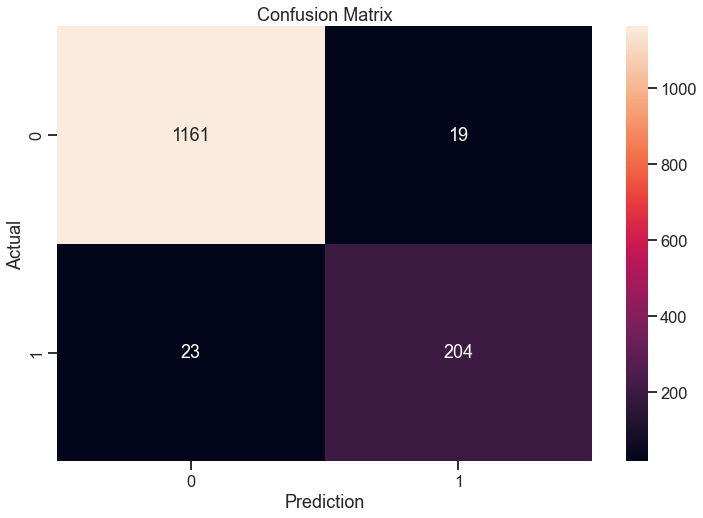

In [268]:
#Plot confusion matrix
cf_svc = confusion_matrix(y_test, svc_pred )
plt.figure(figsize=(12, 8))
sns.set_context('talk')
ax = sns.heatmap(cf_svc, annot=True, fmt="d")
ax.set(title="Confusion Matrix",ylabel='Actual',xlabel='Prediction');

In [269]:
#Display metrics from the different models
metrics=metrics.reshape(3,2)
metric=pd.DataFrame(metrics)
metric.columns=['Accuracy','F1_score']
metric.index=['Logistic Regression','KNN','SVM']
metric.T


,Logistic Regression,KNN,SVM
Accuracy,0.956645,0.914001,0.970149
F1_score,0.862302,0.862302,0.906667
